## Mini Project III

In [64]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [6]:
customers = pd.read_csv('mini-project-csv/twm_customer.csv',
                        delimiter=';')

In [12]:
### Check how many rows and columns are in the customer dataset

In [7]:
customers.shape

(747, 15)

In [13]:
### Check the datatypes for each column 

In [8]:
customers.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [17]:
### Check for any null values for the columns

In [18]:
customers.isna().sum()

cust_id            0
income             0
age                0
years_with_bank    0
nbr_children       0
gender             0
marital_status     0
name_prefix        0
first_name         0
last_name          0
street_nbr         0
street_name        0
postal_code        0
city_name          0
state_code         0
dtype: int64

In [19]:
### Remove unneccessary columns 

In [22]:
## Check unique states 
customers['state_code'].value_counts()

CA      177
NY      107
TX       83
IL       56
AZ       24
OH       23
PA       21
TN       18
MO       17
FL       16
OK       16
OR       16
IN       16
WI       15
MN       13
HI       13
KY       13
NJ       12
CO       11
NC        9
MI        9
WA        9
MA        8
MD        8
NM        7
DC        6
VA        5
NV        4
AL        4
KS        3
LA        3
NB        3
GA        2
Name: state_code, dtype: int64

In [26]:
### check the distinct city names to decide whether to use in clustered data
customers['city_name'].value_counts()

New York City                               98
Los Angeles                                 84
Chicago                                     56
Houston                                     39
San Francisco                               23
                                            ..
Tampa                                        2
Colorado Springs                             2
Virginia Beach                               1
Arlington                                    1
Buffalo                                      1
Name: city_name, Length: 69, dtype: int64

In [ ]:
demographics = customers[['age', 'gender', 'marital_status', 'income','state_code','city_name']]

In [27]:
df_numeric = customers[['age', 'income']]

In [28]:
df_numeric

,age,income
0,46,26150
1,71,6605
2,38,18548
3,54,47668
4,59,44554
...,...,...
742,36,14795
743,56,26387
744,50,61300
745,37,15100


<Axes: xlabel='age', ylabel='Count'>

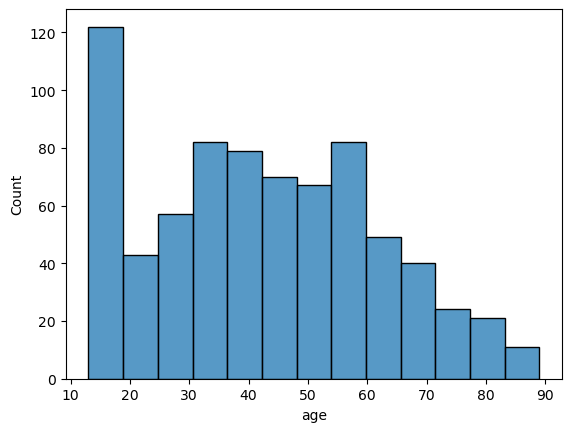

In [34]:
# Check to see if numeric data is normally distributed 
sns.histplot(data=df_numeric['age'])

<Axes: xlabel='income', ylabel='Count'>

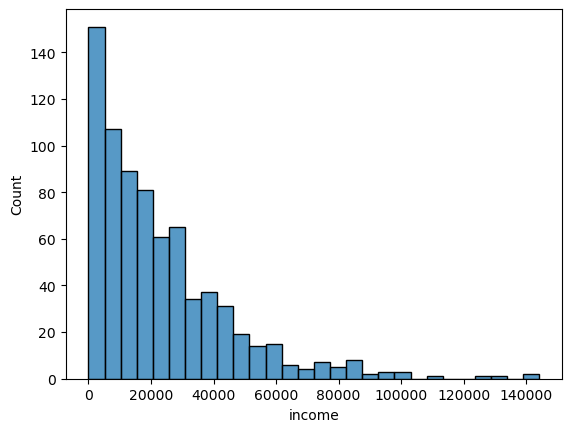

In [38]:
# Check to see if income is normally distributed
sns.histplot(data=df_numeric['income'])

In [40]:
# Scale our numeric data age and income
scaler = StandardScaler()
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_numeric))

In [43]:
# Add column names to our scaled dataframe
df_numeric_scaled.columns = df_numeric.columns

In [44]:
df_numeric_scaled

,age,income
0,0.184312,0.154185
1,1.493070,-0.726524
2,-0.234490,-0.188366
3,0.603115,1.123798
4,0.864867,0.983479
...,...,...
742,-0.339191,-0.357478
743,0.707816,0.164864
744,0.393714,1.738064
745,-0.286841,-0.343735


In [48]:
# Create dataframe for our categorical columns 
df_categorical = customers[['gender', 'marital_status', 'state_code', 'city_name']]

In [49]:
df_categorical

,gender,marital_status,state_code,city_name
0,M,2,NV,Las Vegas
1,M,2,CA,Los Angeles
2,F,1,CA,Los Angeles
3,F,1,CA,Los Angeles
4,F,4,NY,New York City
...,...,...,...,...
742,F,4,CA,Los Angeles
743,M,2,NY,New York City
744,M,2,NM,Albuquerque
745,F,2,AL,Birmingham


In [50]:
df_dummy = pd.get_dummies(df_categorical)

In [51]:
df_dummy

,marital_status,gender_F,gender_M,state_code_AL,state_code_AZ,state_code_CA,state_code_CO,state_code_DC,state_code_FL,state_code_GA,...,city_name_Seattle,city_name_St Louis,city_name_St Paul,city_name_Tampa,city_name_Toledo,city_name_Tucson,city_name_Tulsa,city_name_Virginia Beach,city_name_Washington,city_name_Wichita
0,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,4,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
743,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
744,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,2,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
X = pd.concat([df_numeric_scaled, df_dummy], axis=1)

In [55]:
X

,age,income,marital_status,gender_F,gender_M,state_code_AL,state_code_AZ,state_code_CA,state_code_CO,state_code_DC,...,city_name_Seattle,city_name_St Louis,city_name_St Paul,city_name_Tampa,city_name_Toledo,city_name_Tucson,city_name_Tulsa,city_name_Virginia Beach,city_name_Washington,city_name_Wichita
0,0.184312,0.154185,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.493070,-0.726524,2,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.234490,-0.188366,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.603115,1.123798,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.864867,0.983479,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,-0.339191,-0.357478,4,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
743,0.707816,0.164864,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
744,0.393714,1.738064,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,-0.286841,-0.343735,2,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
inertias = []
K = range(1,11) #run K-means with K ranging from 1 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    inertias.append(kmeanModel.inertia_)


/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ckz/anaconda3/lib/pyt

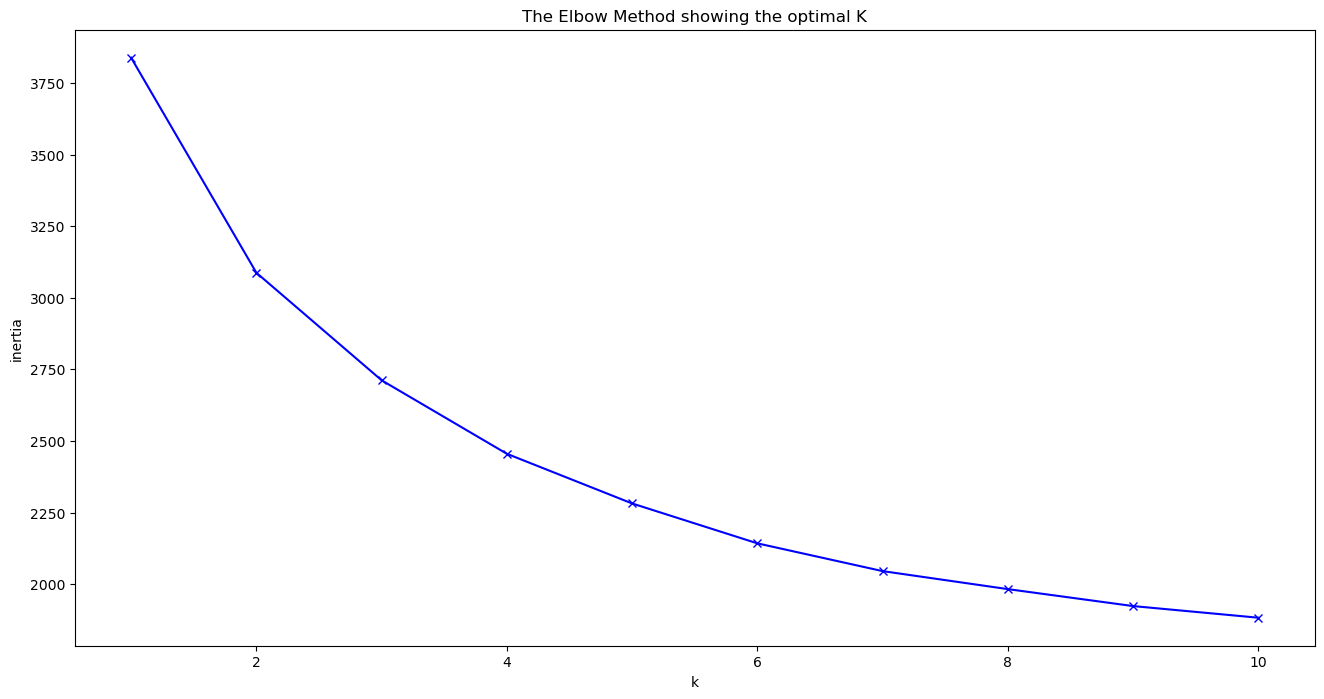

In [62]:
# plot elbow method
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

In [65]:
silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    label=kmeanModel.predict(X)
    silhouettes.append(silhouette_score(X,label))

/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ckz/anaconda3/lib/pyt

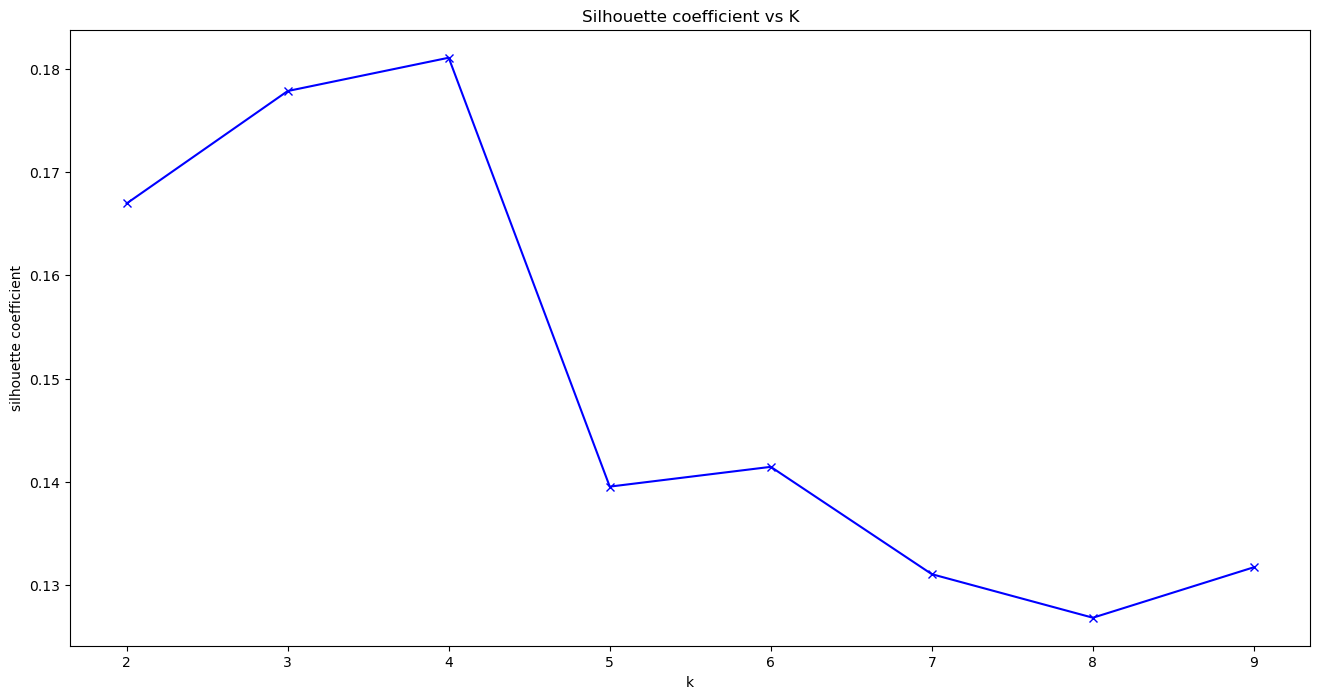

In [66]:
# plot silhouette
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

In [67]:
 kmodel = KMeans(n_clusters=3,
                n_init=10)